In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)

In [2]:
houses = np.loadtxt("houses.csv", delimiter=",", skiprows=1)
x_train = houses[:, :4]
y_train = houses[:, 4]
print(x_train.shape)
print(y_train.shape)

(100, 4)
(100,)


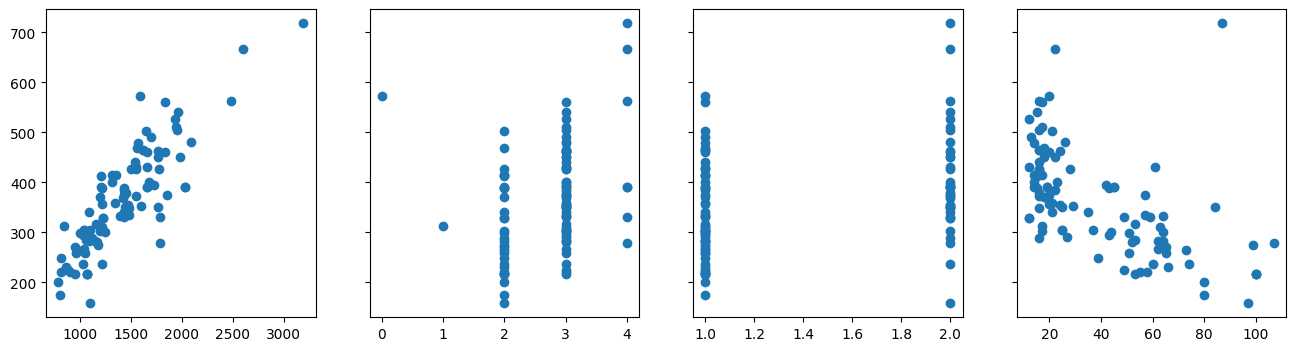

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:, i], y_train)
plt.show()

In [4]:
def model(x, w, b):
    return np.dot(x, w) + b


def cost(x, y, w, b):
    m = x.shape[0]
    f = model(x, w, b)
    cost = np.sum((f - y) ** 2) / (2 * m)
    return cost


def gradient(x, y, w, b):
    m, n = x.shape
    f = model(x, w, b)
    dj_dw = np.sum((f - y)[:, np.newaxis] * x, axis=0) / m
    dj_db = np.sum(f - y) / m
    return dj_dw, dj_db


def gradient_descent(x, y, alpha, iterations):
    w = np.zeros(x.shape[1])
    b = 0
    costs = []
    for i in range(iterations):
        dj_dw, dj_db = gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        costs.append(cost(x, y, w, b))
        if i % (iterations // 10) == 0:
            print(f"iteration #{i}, w = {w}, b = {b}, cost = {costs[-1]}")
    return w, b, costs

In [5]:
def test_alpha(alpha):
    w, b, costs = gradient_descent(x_train, y_train, alpha, 10)
    plt.plot(costs)
    plt.title(f"alpha = {alpha}")
    plt.show()

iteration #0, w = [0.54 0.   0.   0.01], b = 0.00035861712480000007, cost = 93105.49165523113
iteration #1, w = [-0.08 -0.   -0.   -0.  ], b = -4.371595497461479e-05, cost = 122207.39443625291
iteration #2, w = [0.64 0.   0.   0.01], b = 0.00042753756354613627, cost = 160561.8379418393
iteration #3, w = [-0.19 -0.   -0.   -0.01], b = -0.00010409001756762491, cost = 211110.49432022285
iteration #4, w = [0.76 0.   0.   0.01], b = 0.000515608532550849, cost = 277730.2853999486
iteration #5, w = [-0.33 -0.   -0.   -0.01], b = -0.0001864223166113308, cost = 365530.72784597566
iteration #6, w = [0.92 0.   0.   0.02], b = 0.0006289145937820748, cost = 481245.8136507911
iteration #7, w = [-0.51 -0.   -0.   -0.02], b = -0.00029769805054769493, cost = 633750.4817034598
iteration #8, w = [1.13 0.   0.   0.02], b = 0.0007754747892522196, cost = 834741.2918412265
iteration #9, w = [-0.75 -0.   -0.   -0.02], b = -0.0004471232238302034, cost = 1099633.5064940737


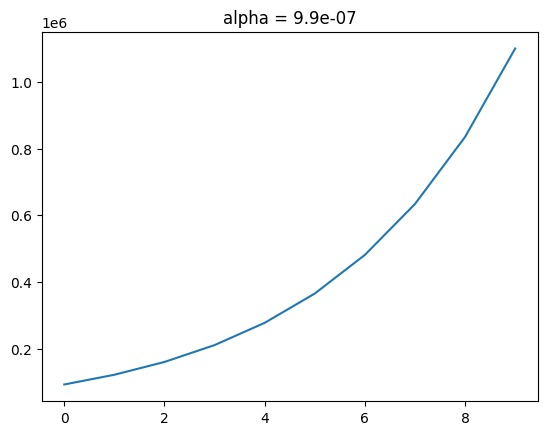

In [6]:
test_alpha(9.9e-7)

iteration #0, w = [0.49 0.   0.   0.01], b = 0.00032601556800000004, cost = 64613.72525212249
iteration #1, w = [ 0.02  0.    0.   -0.  ], b = 2.3146669409409236e-05, cost = 58794.93732504862
iteration #2, w = [0.47 0.   0.   0.01], b = 0.0003194449968427887, cost = 53513.131445745115
iteration #3, w = [ 0.04  0.    0.   -0.  ], b = 4.4898927021072566e-05, cost = 48718.74952366944
iteration #4, w = [0.45 0.   0.   0.01], b = 0.00031422309028463267, cost = 44366.80719127468
iteration #5, w = [ 0.06  0.    0.   -0.  ], b = 6.538639914176425e-05, cost = 40416.4716944774
iteration #6, w = [0.43 0.   0.   0.01], b = 0.00031022631495186963, cost = 36830.678739670926
iteration #7, w = [ 0.08  0.    0.   -0.  ], b = 8.472674729497783e-05, cost = 33575.78470198266
iteration #8, w = [0.42 0.   0.   0.  ], b = 0.00030734253683108273, cost = 30621.25093127945
iteration #9, w = [ 0.1  0.   0.  -0. ], b = 0.00010302677245502417, cost = 27939.357193615564


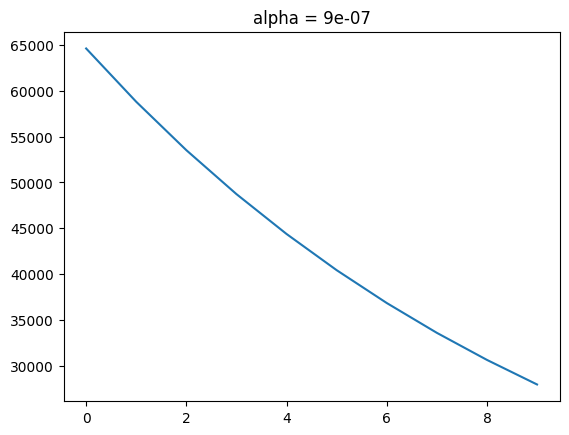

In [7]:
test_alpha(9e-7)

iteration #0, w = [0.05 0.   0.   0.  ], b = 3.6223952e-05, cost = 44154.43013429887
iteration #1, w = [0.1 0.  0.  0. ], b = 6.468389823962233e-05, cost = 27679.694930115085
iteration #2, w = [0.13 0.   0.   0.  ], b = 8.706440894193224e-05, cost = 17578.44869953159
iteration #3, w = [0.16 0.   0.   0.  ], b = 0.00010468455161457146, cost = 11385.008917998324
iteration #4, w = [0.18 0.   0.   0.  ], b = 0.00011857719450230632, cost = 7587.5803814807805
iteration #5, w = [0.19 0.   0.   0.  ], b = 0.00012955110349822704, cost = 5259.229181746172
iteration #6, w = [0.21 0.   0.   0.  ], b = 0.00013823956583233364, cost = 3831.620091946985
iteration #7, w = [0.22 0.   0.   0.  ], b = 0.00014513846383472394, cost = 2956.287134943742
iteration #8, w = [0.22 0.   0.   0.  ], b = 0.00015063608780017558, cost = 2419.5737723278826
iteration #9, w = [0.23 0.   0.   0.  ], b = 0.00015503648032871457, cost = 2090.479793463249


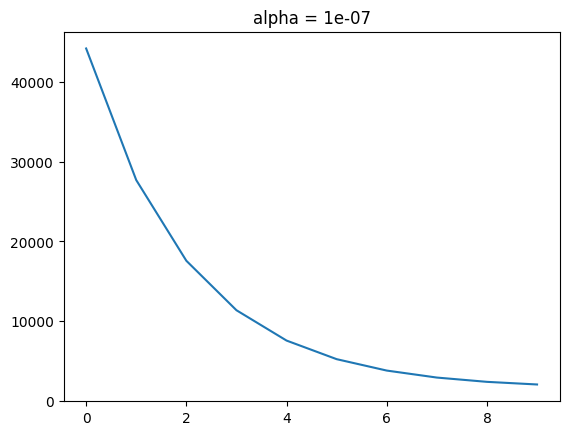

In [8]:
test_alpha(1e-7)

In [9]:
def zscore_normalize_features(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    x = (x - mu) / sigma
    return x, mu, sigma


x_norm, x_mu, x_sigma = zscore_normalize_features(x_train)
print(x_mu, x_sigma)

[1413.71    2.71    1.38   38.65] [412.17   0.65   0.49  25.79]


iteration #0, w = [ 8.92  3.02  3.33 -5.99], b = 36.223952000000004, cost = 57326.41707912138
iteration #100, w = [107.86 -20.1  -31.1  -38.31], b = 362.23086057045475, cost = 221.72784412580998
iteration #200, w = [110.52 -21.43 -32.61 -37.8 ], b = 362.2395197699934, cost = 219.71370925927516
iteration #300, w = [110.61 -21.47 -32.66 -37.78], b = 362.23951999999383, cost = 219.71130463983715
iteration #400, w = [110.61 -21.47 -32.66 -37.78], b = 362.23951999999974, cost = 219.71130176839497
iteration #500, w = [110.61 -21.47 -32.66 -37.78], b = 362.2395199999998, cost = 219.71130176496618
iteration #600, w = [110.61 -21.47 -32.66 -37.78], b = 362.2395199999998, cost = 219.7113017649621
iteration #700, w = [110.61 -21.47 -32.66 -37.78], b = 362.2395199999998, cost = 219.7113017649621
iteration #800, w = [110.61 -21.47 -32.66 -37.78], b = 362.2395199999998, cost = 219.71130176496206
iteration #900, w = [110.61 -21.47 -32.66 -37.78], b = 362.2395199999998, cost = 219.71130176496206


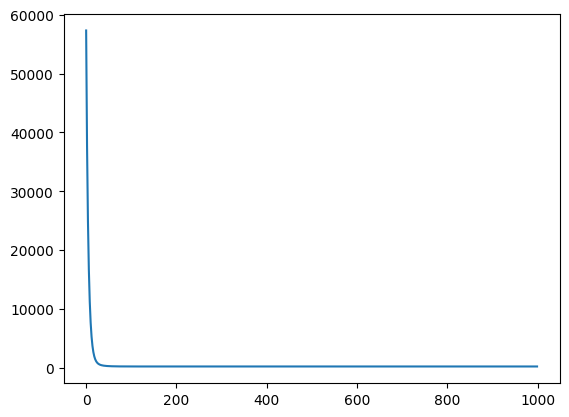

In [10]:
w, b, costs = gradient_descent(x_norm, y_train, 0.1, 1000)
plt.plot(costs)
plt.show()

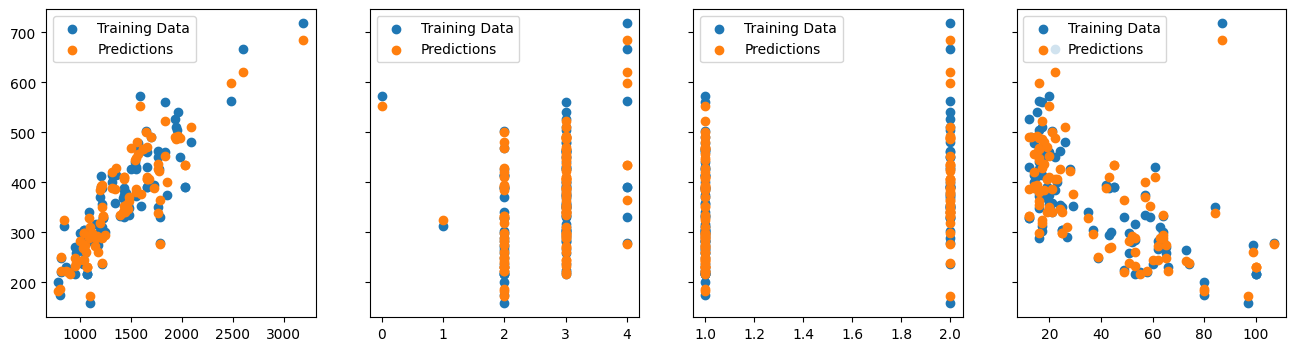

In [11]:
predictions = model(x_norm, w, b)
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:, i], y_train, label="Training Data")
    ax[i].scatter(x_train[:, i], predictions, label="Predictions")
    ax[i].legend()
plt.show()

In [12]:
for i in range(10):
    print(predictions[i], y_train[i], sep="\t")

248.65591798425436	271.5
295.58045872978835	300.0
485.8168952401615	509.8
389.61035726289145	394.0
491.9676276490038	540.0
420.52811441719916	415.0
223.57450462604518	230.0
523.3162632360503	560.0
267.84509754820516	294.0
685.004473513027	718.2
